In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Read the City and Ride Data
#city_data.head()
#ride_data.head()
# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")
# Display the data table for preview
#combined_data_index = combined_data.set_index("type")
#combined_data_index.head()
#combined_data["city"].nunique()
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [77]:
# Obtain the x and y coordinates for each of the three city types
 
city_type_df = combined_data.groupby('type')
#index = combined_data.groupby('type').size()
#city_type_df = combined_data.groupby(['type']['city'])

In [2]:
#URBAN
urban_only = pd.DataFrame(combined_data.loc[combined_data["type"] == "Urban", :])
urban_city = urban_only.groupby('city')
#print(urban_only)
urban_only_count = pd.DataFrame(urban_city['ride_id'].count())
#urban_total
urban_fare_average = pd.DataFrame(urban_city['fare'].mean())
urban_final = pd.merge(urban_only_count, urban_fare_average, how="outer", on="city")
urban_drivers = pd.DataFrame(urban_city['driver_count'].count())
urban_final_df = pd.merge(urban_final, urban_drivers, how="outer", on="city")

In [50]:
#plt.scatter(urban_final['ride_id'], urban_final['fare'], marker="o", facecolors="red", edgecolors="black")


In [3]:
#SUBURBAN
suburban_only = pd.DataFrame(combined_data.loc[combined_data["type"] == "Suburban", :])
suburban_city = suburban_only.groupby('city')
#print(urban_only)
suburban_only_count = pd.DataFrame(suburban_city['ride_id'].count())
#urban_total
suburban_fare_average = pd.DataFrame(suburban_city['fare'].mean())
suburban_final = pd.merge(suburban_only_count, suburban_fare_average, how="outer", on="city")
suburban_drivers = pd.DataFrame(suburban_city['driver_count'].count())
suburban_final_df = pd.merge(suburban_final, suburban_drivers, how="outer", on="city")

In [49]:
#plt.scatter(suburban_final['ride_id'], suburban_final['fare'], marker="o", facecolors="blue", edgecolors="black")



In [4]:
#RURAL
rural_only = pd.DataFrame(combined_data.loc[combined_data["type"] == "Rural", :])
rural_city = rural_only.groupby('city')
#print(urban_only)
rural_only_count = pd.DataFrame(rural_city['ride_id'].count())
#urban_total
rural_fare_average = pd.DataFrame(rural_city['fare'].mean())
rural_final = pd.merge(rural_only_count, rural_fare_average, how="outer", on="city")
rural_drivers = pd.DataFrame(rural_city['driver_count'].count())
rural_final_df = pd.merge(rural_final, rural_drivers, how="outer", on="city")

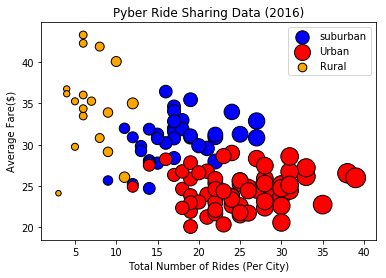

In [8]:

#plot the graph 
plt.scatter(suburban_final['ride_id'], suburban_final['fare'], marker="o", facecolors="blue", edgecolors="black", label="suburban", s= 10*suburban_drivers)
plt.scatter(urban_final['ride_id'], urban_final['fare'], marker="o", facecolors="red", edgecolors="black", label="Urban", s= 10*urban_drivers)
plt.scatter(rural_final['ride_id'], rural_final['fare'], marker="o", facecolors="orange", edgecolors="black", label="Rural", s= 10*rural_drivers)

#add the circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size


# Save Figure
plt.savefig("../Images/Bubbleplot.png")
plt.show()

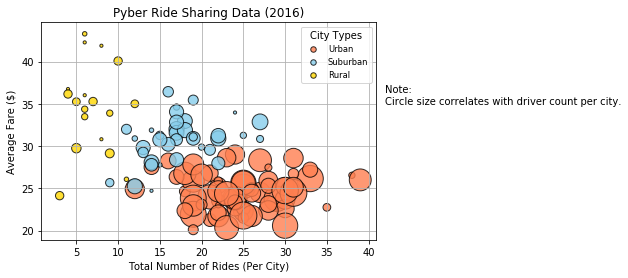

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [78]:
# Calculate Driver Percents
city_type = pd.DataFrame(city_type_df['fare'].sum())

city_type

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [72]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
city_type = [39854.38, 19356.33, 4327.93]

# The colors of each section of the pie chart
colors = ["lightblue", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Save Figure


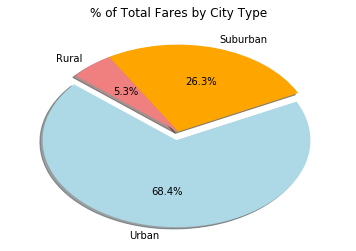

In [89]:
# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("../Images/TotalFaresByCityType.png")
plt.show()

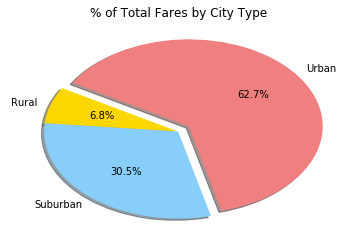

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [79]:
# Calculate Ride Percents
total_rides = pd.DataFrame(city_type_df['ride_id'].count())

total_rides


,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [80]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
city_type = [1625, 625, 125]

# The colors of each section of the pie chart
colors = ["lightblue", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Save Figure

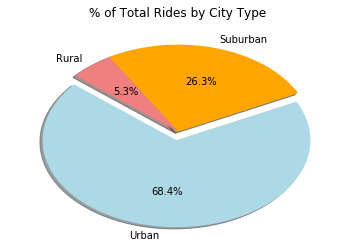

In [90]:
# Build Pie Chart
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("../Images/TotalRidesByCityType.png")
plt.show()


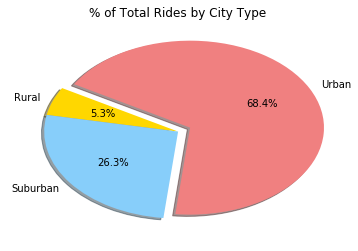

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [95]:
# Calculate Driver Percents
total_drivers = pd.DataFrame(city_type_df['driver_count'].sum())

total_drivers

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


In [96]:
# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
driver_count = [59602, 8570, 537]

# The colors of each section of the pie chart
colors = ["lightblue", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)



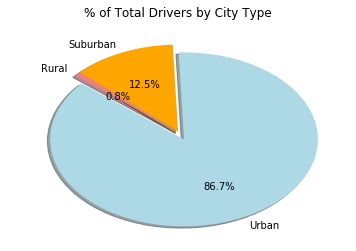

In [97]:
plt.title("% of Total Drivers by City Type")
plt.pie(driver_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#save figure
plt.savefig("../Images/TotalDriversByCityType.png")
plt.show()


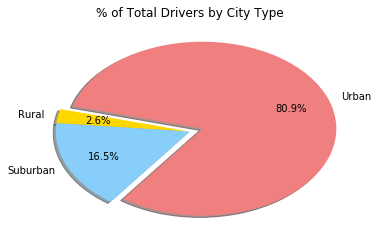

In [6]:
# Show Figure
plt.show()